<h1>Redes Neuronales</h1>

<h3>Gradiente Descendente</h3>

J=1/2. Sumatoria(y-y')^2

y=valor real deseado

y'=valor alcanzado o predicho

Como se usa : Se suma el valor deseado con el valor predicho y luego se eleva al 2 , esto se realiza con cada prediccion , se suman todos los resultados y luego se divide entre 2.

Desventajas: Se requiere mas memoria

<h3>Gradiente Descendente Estocástico</h3>

La diferencia con respecto al Gradiente Descendente es que en vez de corregir el peso luego de haber iterado todas las veces , se va a corregir por cada iteracion y la siguiente iteracion se calculara teniendo en cuenta el peso calculado en la anterior.

<h1>TensorFlow</h1>

<h3>Reconocimiento de Imagenes</h3>

Primeramente se importan la librerias a utilizar

In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals
import os
#Importamos TF y Keras
import tensorflow as tf
from tensorflow import keras
#Para nombrar archivos
import datetime
import numpy as np
import matplotlib.pyplot as plt
#Para cargar imagenes desde internet 
from PIL import Image
import requests
from io import BytesIO
#Reescalar imagen
import cv2 


Luego se guarda el dataset con el que se va a trabajar en una varibale y de dividen los datos de testeo y los de prueba.

In [3]:
f=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=f.load_data()

Se muestra en una grafica para comprobar los datos que se guardaron

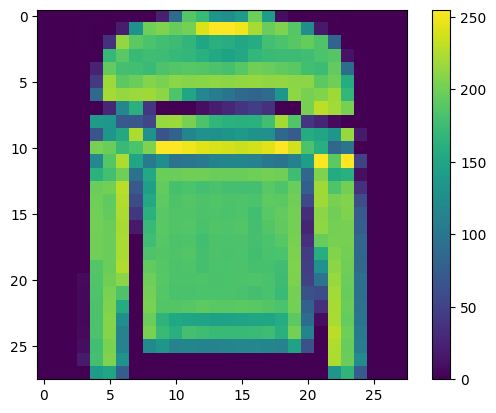

In [7]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Se guardan los labels(Etiquetas) para saber que es que.

In [8]:
class_names=['Camiseta','Pantalon','Sueter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla Deportiva','Bolso','Botines']

Observamos la forma de un dato para saber a que nos enfrentamos

In [9]:
train_images[1].shape

(28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
train_images.shape

(60000, 28, 28)

De esta forma podmeos ver las etiquetas de testeo.

In [12]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

De esta forma reescalamos la imagen de 0 a 1

In [13]:
train_images=train_images / 255
test_images=test_images / 255

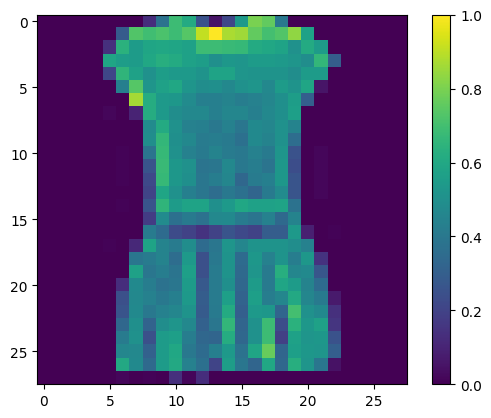

In [14]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

De la siguiente manera podemos observar la lista de elementos que tenemos en el dataset.

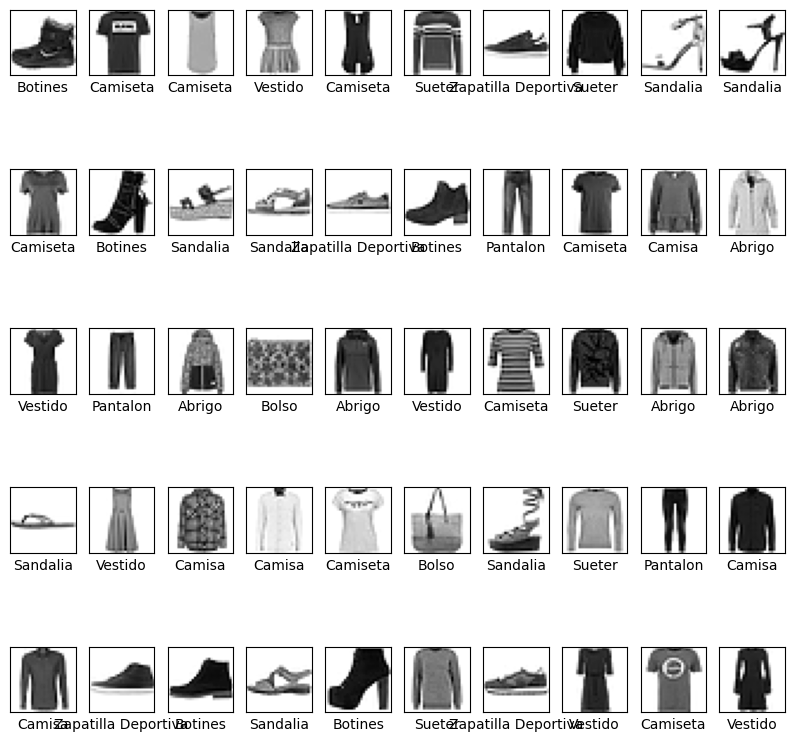

In [15]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

<h2>Creando la Red Neuronal</h2>

Usando el metodo Sequential de Keras se le pasa por parametros las capas de nuestra red nueronal.


Una capa Flatten es una capa plana la cual no recibe peso por lo tanto no posee parametros. Se le pasa la Shape del dato que se esta tratando , en este caso la shape de la imagen que se utiliza es de 28x28.

Luego la capa Dense es una capa densa la cual si posee peso por tanto posee parametros , se le pasa por parametros primeramente la cantidad de neuronas que va a poseer en este caso 15 , y luego en activation= la funcion que va a utilizar.

La ultima capa tambien es de tipo Dense porque posee peso y por tanto parametros a esta se le pasa por parametros la cantidad de salidas en este caso 10 y en activation= la funcion que va a utilizar.

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

Con .summary() podemos ver un resumen de nuestra red neuronal.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11935 (46.62 KB)
Trainable params: 11935 (46.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h2>Ajustando el Modelo</h2>

El modelo se ajusta utilizando el metodo compile al cual se le pasa por parametro en optimizer='' el tipo de funcion que va a utilizar para realizar sus calculos.

Luego en loss='' se especifica la funcion que va a utlizar para trata las perdidas y por tanto mejorar su error.

Y por ultimo en metrics se le pasa el tipo de metrica para mostrar su precision.

In [18]:
model.compile(optimizer=keras.optimizers.Adam(0.0003), loss='sparse_categorical_crossentropy',metrics=['accuracy','recall','presicion','f1_score'])

Con fit() se le pasa al modelo ya listo los datos de entrenamiento y las epocas en las que se va a ejecutar.

In [19]:
checkpoint_path='checkpoints/check'
cp_callbacks=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
model.fit(train_images,train_labels,validation_data=(),epochs=10,callbacks=[cp_callbacks])

Epoch 1/10
1843/1875 [============================>.] - ETA: 0s - loss: 0.6731 - accuracy: 0.7720
Epoch 1: saving model to checkpoints\check
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6699 - accuracy: 0.7731
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.8421
Epoch 2: saving model to checkpoints\check
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4498 - accuracy: 0.8422
Epoch 3/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.4171 - accuracy: 0.8533
Epoch 3: saving model to checkpoints\check
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4168 - accuracy: 0.8534
Epoch 4/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.4003 - accuracy: 0.8588
Epoch 4: saving model to checkpoints\check
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4002 - accuracy: 0.8589
Epoch 5/10
1866/1875 [============================>.] - ETA: 0s - loss: 

De esta forma podemos observar la efectividad de nuestro modelo.
(Tener cuidado de no sobre ajustar)

Consejo: Fijarse en la accuracy mas alta de las epocas y luego compararlo con la precision del modelo al pasarle los datos de testeo. 

In [20]:
test_loss , test_accuracy = model.evaluate(test_images,test_labels)
print("Precision:",test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.8515
Precision: 0.8514999747276306


<h2>Predicciones</h2>

Usando el metodo .predict() y pasandole por parametro algun dato puede predecir usando los labels disponibles cual es el mas probable que sea.

In [21]:
prediction=model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


Comprobamos las predicciones para un dato del dataset de testeo.

In [22]:
prediction[3]

array([1.3536272e-06, 9.9989331e-01, 3.3671861e-07, 1.0442787e-04,
       1.9226235e-07, 7.7951662e-10, 1.5650450e-07, 3.5198350e-10,
       2.2183163e-07, 1.4182089e-10], dtype=float32)

In [23]:
np.argmax(prediction[3])

1

<h2>Cargando una imagen externa</h2>

In [24]:
img=Image.open('C:/Users/Will/OIP.jpg')


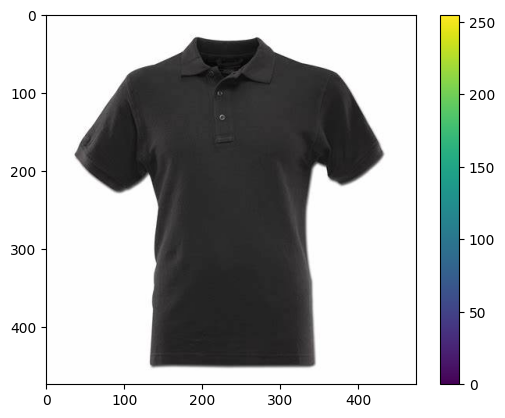

In [25]:
np_img=np.array(img)
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()


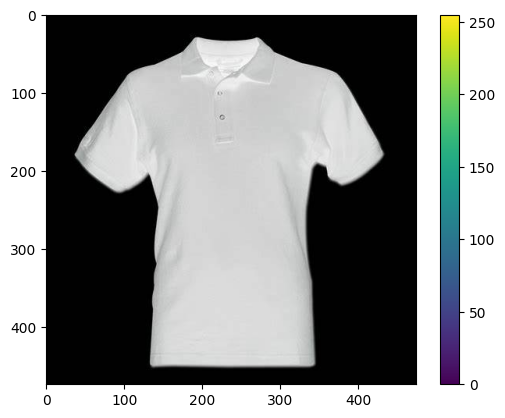

In [26]:

#inverted_img_np = np.abs(255 - np_img)
#inverted_img = Image.fromarray(inverted_img_np)
np_img=255-np_img
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
np_img.shape

(474, 474, 3)

In [28]:
def rgb (rgb):
    return np.dot(rgb[...,:3],[0.333,0.333,0.333])

In [29]:
img_grises=rgb(np_img)

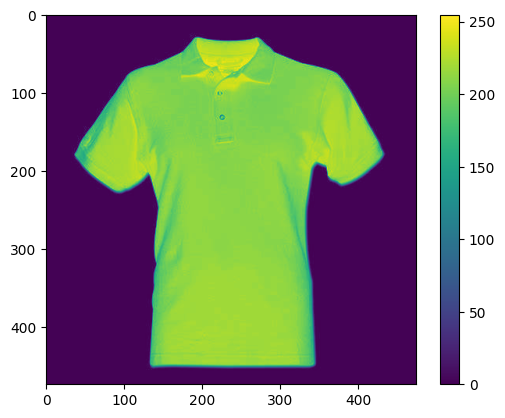

(474, 474)

In [30]:
plt.figure()
plt.imshow(img_grises)
plt.colorbar()
plt.grid(False)
plt.show()
img_grises.shape

In [31]:
res=cv2.resize(img_grises,dsize=(28,28),interpolation=cv2.INTER_CUBIC)

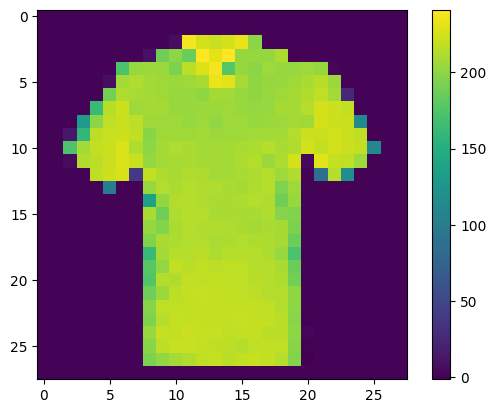

(28, 28)

In [32]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()
res.shape

In [33]:
res=res/255

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()
res.shape

NameError: name 'res' is not defined

<Figure size 2000x2000 with 0 Axes>

In [35]:
x=np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [36]:
x[0]=np.array(res)

In [37]:
prediction=model.predict(x)

1/1 [==============================] - 0s 30ms/step


In [38]:
prediction[0]

array([9.3661648e-01, 7.6084852e-08, 1.5551261e-04, 7.9499114e-06,
       4.9472965e-06, 8.0407626e-15, 6.3209102e-02, 5.4935538e-18,
       5.8769651e-06, 4.5112611e-18], dtype=float32)

In [39]:
np.argmax(prediction[0])

0

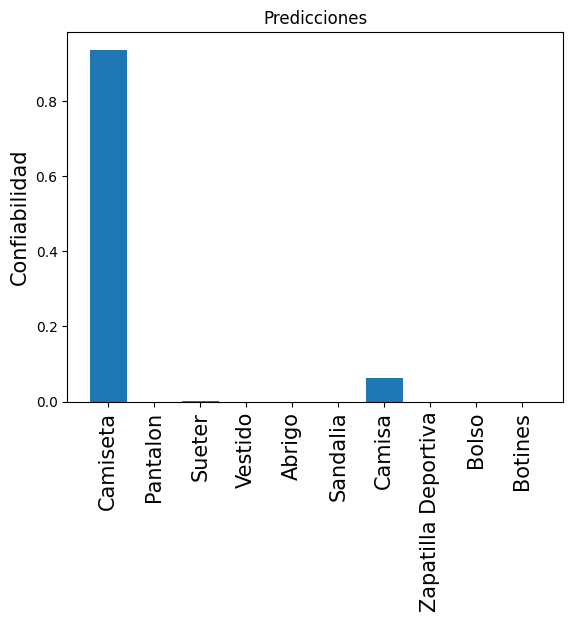

In [40]:
index=np.arange(len(class_names))
plt.bar(index,prediction[0])
plt.ylabel('Confiabilidad',fontsize=15)
plt.xticks(index,class_names,fontsize=15,rotation=90)
plt.title("Predicciones")
plt.show()

In [41]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(10,activation='softmax')


])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
test_loss , test_accuracy = model2.evaluate(test_images,test_labels)
print("Precision:",test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 2.3688 - accuracy: 0.1539
Precision: 0.15389999747276306


In [42]:
model2.load_weights(checkpoint_path)

In [43]:
test_loss , test_accuracy = model2.evaluate(test_images,test_labels)
print("Precision:",test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8515
Precision: 0.8514999747276306


<h2>TENSORBOARD</h2>

In [44]:
checkpoint_path='checkpoints/check'
log_dir="logs/fit2/"+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
cp_callbacks=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)


model.fit(train_images,train_labels,epochs=50,validation_data=(test_images,test_labels),callbacks=[cp_callbacks,tensorboard_callback])

Epoch 1/50
1857/1875 [============================>.] - ETA: 0s - loss: 0.3565 - accuracy: 0.8739
Epoch 1: saving model to checkpoints\check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3562 - accuracy: 0.8741 - val_loss: 0.4167 - val_accuracy: 0.8552
Epoch 2/50
1869/1875 [============================>.] - ETA: 0s - loss: 0.3531 - accuracy: 0.8743
Epoch 2: saving model to checkpoints\check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3530 - accuracy: 0.8742 - val_loss: 0.4284 - val_accuracy: 0.8470
Epoch 3/50
1855/1875 [============================>.] - ETA: 0s - loss: 0.3505 - accuracy: 0.8752
Epoch 3: saving model to checkpoints\check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3509 - accuracy: 0.8751 - val_loss: 0.4333 - val_accuracy: 0.8462
Epoch 4/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.3478 - accuracy: 0.8764
Epoch 4: saving model to checkpoints\check
1875/1875 [==========================

Lo siguiente es para observar los datos en TensorBoard desde un cmd.
Se debe estar situado en la carpeta raiz

python -m tensorboard.main --logdir=logs/fit2
